In [1]:
from sklearn.decomposition import PCA
import sklearn.cluster
import numpy
import matplotlib.pyplot as plt
from sklearn import preprocessing

import sys
sys.path.append('../')
from database.models import get_db_session
from database.models import NumericCluster as NCluster

In [2]:
session = get_db_session('sqlite:///../incidences.db')

In [3]:
# Obtain attributes from the cluster transformed.
accidents = session.query(NCluster.accidents, 
                          NCluster.nivel_medio, 
                          NCluster.carretera, 
                          NCluster.causa_ppal, 
                          NCluster.na_causa).all()

accidents = [row for row in accidents]

In [4]:
#Normalization
min_max_scaler = preprocessing.MinMaxScaler()
accidents = min_max_scaler.fit_transform(accidents)
accidents = [row for row in accidents]

In [5]:
#PCA Estimation
estimator = PCA(n_components=3)
X_pca = estimator.fit_transform(accidents)

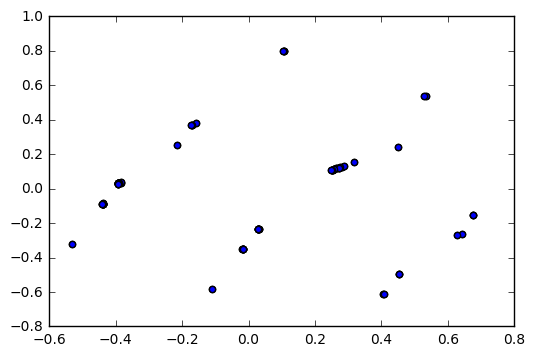

In [6]:
plt.scatter([x[0] for x in X_pca], [x[1] for x in X_pca])
plt.show()